In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("final_clean_data_V2.csv")
df

,price(€),monthly(€),energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),terrace,view,area(m²),room,bedroom,year_of_construction,...,"est, ouest","est, ouest, sud","est, sud",nord,"nord, ouest","nord, ouest, sud","nord, sud",ouest,"ouest, sud",sud
0,459000,1900,218.0,40.0,0,0,188.037689,9,6,1982.0,...,1,0,0,0,0,0,0,0,0,0
1,319000,1324,307.0,17.0,0,0,151.977132,6,4,0.0,...,1,0,0,0,0,0,0,0,0,0
2,343930,1426,250.0,15.0,0,0,147.990534,7,5,0.0,...,0,0,0,0,0,0,0,0,0,1
3,392600,1627,187.0,8.0,0,0,147.983415,5,3,0.0,...,0,0,0,0,0,0,0,0,0,0
4,459000,1900,218.0,37.0,0,0,188.037689,8,5,1982.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,249000,1035,0.0,0.0,0,0,229.070837,7,3,0.0,...,0,0,0,0,0,0,0,0,0,0
7143,242000,1006,0.0,0.0,0,0,95.013742,4,3,0.0,...,1,0,0,0,0,0,0,0,0,0
7144,281000,1167,142.0,33.0,0,0,95.969945,4,2,1900.0,...,0,0,1,0,0,0,0,0,0,0
7145,490000,2028,60.0,14.0,0,0,200.000000,9,4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y1_price = pd.DataFrame(np.log(df['price(€)']))
y2_monthly = pd.DataFrame(np.log(df['monthly(€)']))
df = df.drop('price(€)', 1)
df = df.drop('monthly(€)', 1)
x = pd.DataFrame(df)
y1_price

,price(€)
0,13.036805
1,12.672946
2,12.748193
3,12.880547
4,13.036805
...,...
7142,12.425208
7143,12.396693
7144,12.546110
7145,13.102161


<h1>Prediction of the prices</h1>

<h2>Linear Regression</h2>

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.7894221772088614
RMSE = 2.385538701090188


<h2>Random Forest Regressor</h2>

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.9360177436394961
RMSE = 0.33012108838679993


In [66]:
Y_test_price - predictions

array([ 0.04278184,  0.19017297, -0.20246579, ...,  0.15020902,
        0.18035637, -0.24744271])

<h2>Decision Tree Regressor</h2>

In [87]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.9999963147794619
RMSE = 0.3976671374370213


<h2>Regression using Keras</h2>

In [12]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Using TensorFlow backend.


W0426 17:13:44.178741  6672 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 4573 samples, validate on 1144 samples
Epoch 1/50
4573/4573 [==============================] - 2s 333us/step - loss: 35.5093 - accuracy: 0.0000e+00 - val_loss: 30.6437 - val_accuracy: 0.0000e+00
Epoch 2/50
4573/4573 [==============================] - 1s 204us/step - loss: 9.7526 - accuracy: 0.0000e+00 - val_loss: 28.4260 - val_accuracy: 0.0000e+00
Epoch 3/50
4573/4573 [==============================] - 1s 222us/step - loss: 9.3851 - accuracy: 0.0000e+00 - val_loss: 26.2779 - val_accuracy: 0.0000e+00
Epoch 4/50
4573/4573 [==============================] - 1s 214us/step - loss: 6.5367 - accuracy: 0.0000e+00 - val_loss: 21.1082 - val_accuracy: 0.0000e+00
Epoch 5/50
4573/4573 [==============================] - 1s 210us/step - loss: 2.5568 - accuracy: 0.0000e+00 - val_loss: 19.9565 - val_accuracy: 0.0000e+00
Epoch 6/50
4573/4573 [==============================] - 1s 203us/step - loss: 7.6597 - accuracy: 0.0000e+00 - val_loss: 55.3651 - val_accuracy: 0.0000e+00
Epoch 7/50
4573/4573 

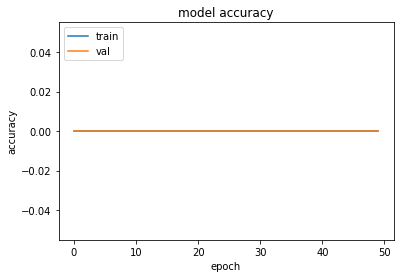

In [13]:
history = model.fit(X_train, Y_train_price,validation_split = 0.2, epochs=50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

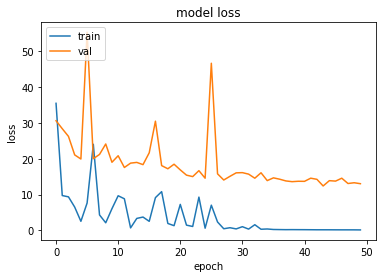

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

RMSE = 0.878418963904857


<h1>Prediction of the monthly prices</h1>

<h2>Linear Regression</h2>

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 0.8370914631076332
RMSE = 2.644407816429222


<h2>Random Forest Regressor</h2>

In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 0.9504955228748221
RMSE = 0.32189653697825305


<h2>Decision Tree Regressor</h2>

In [122]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_train, Y_train_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 0.9999906392365204
RMSE = 0.4665849908022691


<h2>Regression using Keras</h2>

In [22]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 4573 samples, validate on 1144 samples
Epoch 1/50
4573/4573 [==============================] - 1s 274us/step - loss: 16.3871 - accuracy: 0.0000e+00 - val_loss: 2.8922 - val_accuracy: 0.0000e+00
Epoch 2/50
4573/4573 [==============================] - 1s 217us/step - loss: 4.6950 - accuracy: 0.0000e+00 - val_loss: 1.2102 - val_accuracy: 0.0000e+00
Epoch 3/50
4573/4573 [==============================] - 1s 222us/step - loss: 1.7724 - accuracy: 0.0000e+00 - val_loss: 0.8135 - val_accuracy: 0.0000e+00
Epoch 4/50
4573/4573 [==============================] - 1s 219us/step - loss: 6.0351 - accuracy: 0.0000e+00 - val_loss: 0.8343 - val_accuracy: 0.0000e+00
Epoch 5/50
4573/4573 [==============================] - 1s 213us/step - loss: 2.6731 - accuracy: 0.0000e+00 - val_loss: 0.6046 - val_accuracy: 0.0000e+00
Epoch 6/50
4573/4573 [==============================] - 1s 217us/step - loss: 0.9585 - accuracy: 0.0000e+00 - val_loss: 0.7233 - val_accuracy: 0.0000e+00
Epoch 7/50
4573/4573 [=====

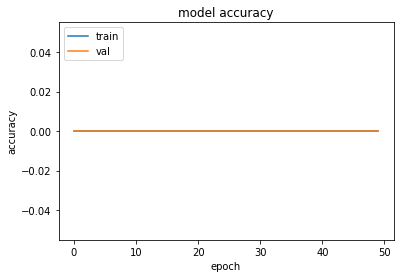

In [23]:
history = model.fit(X_train, Y_train_monthly,validation_split = 0.2, epochs=50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

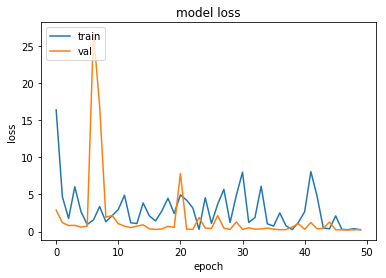

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

RMSE = 0.900853014316883
